<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Diabetes Prediction</strong></p>


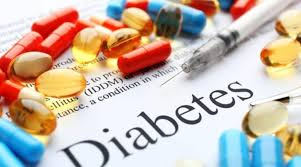

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

<a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Data Description :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Pregnancies: Number of times pregnant</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BloodPressure: Diastolic blood pressure (mm Hg)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>SkinThickness: Triceps skin fold thickness (mm)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Insulin: 2-Hour serum insulin (mu U/ml)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>BMI: Body mass index (weight in kg/(height in m)^2)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>DiabetesPedigreeFunction: Diabetes pedigree functionr</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Age: Age (years)</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Cabin : Cabin Number</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Outcome: Class variable (0 or 1)</strong></li>
</ul>



  

 



In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [ ]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')  #import dataset
data.head(10)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.describe()

**Checking Null Values**

In [ ]:
data.isnull().sum()

In [ ]:
import missingno as msno
msno.bar(data)
plt.show()

**Correlation Matrix**

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.



In [ ]:
sns.heatmap(data.corr(),cbar=False,cmap='BuGn',annot=True)

Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

In [ ]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']

In [ ]:
for i in col:
  data[i].replace(0,data[i].mean(),inplace=True)

<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Exploratory Data Analysis</strong></p>

In [ ]:
p=data.hist(figsize = (20,20))

In [ ]:
sns.pointplot(x='Outcome', y= 'Age', data=data)

In [ ]:
sns.scatterplot(x='Age',y='Insulin',data=data)

In [ ]:
sns.boxplot(x='Outcome',y='Pregnancies',data=data)

**Pairplot**

**Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.**

In [ ]:
sns.pairplot(data,hue='Outcome')

In [ ]:
sns.stripplot(x='Pregnancies',y='Age',data=data)

In [ ]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=data)

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.swarmplot(x="Pregnancies", y="Age", hue="Outcome",
              palette="Dark2", data=data)
ax=sns.set(style="darkgrid")

In [ ]:
g = sns.regplot(x='Insulin',y='Age',data=data)

In [ ]:
data.var()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:

y=data.Outcome

<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Models</strong></p>

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split        
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.30,random_state=3)

**1.Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

**2.KNearestNeighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))


**3.SVC**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

**4.DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))


**5.GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

**6.XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

**7.Stacking**

Stacking is the ensemble technique.In this,two or more classifiers act as base model and the prediction of those will be the x value for the other model(i.e meta-data)
 

In [ ]:
from sklearn.model_selection import train_test_split                #splitting the dataset
                                                                 
train,val_train,test,val_test = train_test_split(X,y,test_size=.50,random_state=3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=.20,random_state=3)

In [ ]:
#first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

In [ ]:
# second model
svm = SVC()
svm.fit(x_train, y_train)

In [ ]:
pred_1=knn.predict(val_train)
pred_2=svm.predict(val_train)

# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [ ]:
pred_test1=knn.predict(x_test)
pred_test2=svm.predict(x_test)


predict_test=np.column_stack((pred_test1,pred_test2))

In [ ]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test)                   
                                                      

In [ ]:

rand_clf.score(result,val_test)

In [ ]:
rand_acc=accuracy_score(y_test ,rand_clf.predict(predict_test))
rand_acc

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier',  'XgBoost','Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,rand_acc,]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()